In [46]:
import cv2
from os import listdir
from pickle import dump
from pickle import load
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
from keras.layers import Input
from keras.layers import Dense
from keras.utils import plot_model
from keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib import cm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, UpSampling2D
from PIL import Image
%matplotlib inline

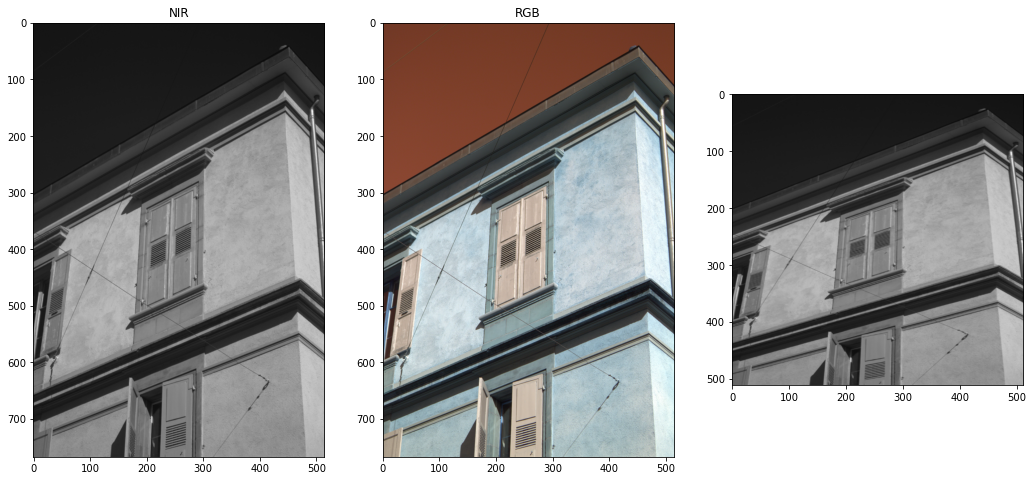

In [47]:
path = '/home/netrunner/Desktop/Raks/val_256/NIR'
f=plt.figure(figsize=(24,24))

for file in listdir(path):
    nir_img_path = '/home/netrunner/Desktop/Raks/val_256/NIR/' + file
    rgb_img_path = '/home/netrunner/Desktop/Raks/val_256/RGB/' + file
    if(file=="013.tiff"):
        img_nir = cv2.imread(nir_img_path)
        ax1=f.add_subplot(141)
        ax1.title.set_text("NIR")
        plt.imshow(img_nir)
#         plt.show()
        img_rgb = cv2.imread(rgb_img_path)
        ax1=f.add_subplot(142)
        ax1.title.set_text("RGB")
        plt.imshow(img_rgb)
        new_array= cv2.resize(img_nir, (512,512))
        ax1=f.add_subplot(143)
        plt.imshow(new_array)
        plt.show()

In [48]:
print(img_nir.shape)

(768, 515, 3)


In [49]:
print (img_rgb.shape)

(768, 515, 3)


In [50]:
img_nir_split,g,b= cv2.split(img_nir)
print(img_nir_split.shape)

(768, 515)


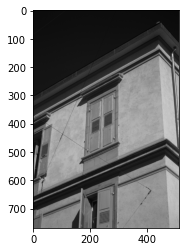

In [51]:
plt.imshow(img_nir_split, cmap='gray')

In [52]:
# dataset
test=[]
X=[]
Y=[]
training_data=[]
errors=[]
sample= cv2.imread("/home/netrunner/Desktop/Raks/val_256/458.tiff")
sample=cv2.resize(sample,(512,512))
test.append(sample)
# print(test)
for file in listdir(path):
    try:
        nir_img_path = '/home/netrunner/Desktop/Raks/val_256/NIR/' + file
        rgb_img_path = '/home/netrunner/Desktop/Raks/val_256/RGB/' + file
        img_nir = cv2.imread(nir_img_path)
        img_rgb = cv2.imread(rgb_img_path)
        img_nir = cv2.resize(img_nir,(512,512))
        img_rgb = cv2.resize(img_rgb,(512,512))

        training_data.append([img_rgb, img_nir])


        X.append(img_rgb)
        Y.append(img_nir)
    except Exception as e:
        errors.append(e)
        
print(len(errors))
X = np.array(X).reshape(-1, 512, 512, 3)
X=X/255

Y = np.array(Y).reshape(-1, 512, 512, 3) 
Y=Y/255
print (len(training_data))


0
54


In [53]:
# for features, label in training_data:
#     X.append(features)
#     Y.append(label)
# X=np.array(X).reshape(-1, 1024, 680, 3)
# X

In [54]:
#  model 

# encoder

model=Sequential()


model.add(Conv2D(64, (3,3), activation='relu', padding='same', strides=2, input_shape=(512,512,3)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

# decoder

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

model.fit(X, Y, validation_split=0.1, epochs=5, batch_size=10, verbose=1)

model.save('/home/netrunner/Desktop/Raks/val_256/cat1.model')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 256, 256, 128)     73856     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 128, 128, 128)     147584    
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 128, 128, 256)     295168    
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 64, 64, 256)       590080    
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 64, 64, 512)       1180160   
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 64, 64, 512)      

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 551.723    2816.9202    298.627   ]
  [ 551.723    2816.9202    298.627   ]
  [1690.7968   4354.3267   1589.4935  ]
  ...
  [2754.2656   2975.8384   2042.6069  ]
  [2350.919     543.47864  2774.248   ]
  [2350.919     543.47864  2774.248   ]]

 [[ 551.723    2816.9202    298.627   ]
  [ 551.723    2816.9202    298.627   ]
  [1690.7968   4354.3267   1589.4935  ]
  ...
  [2754.2656   2975.8384   2042.6069  ]
  [2350.919     543.47864  2774.248   ]
  [2350.919     543.47864  2774.248   ]]

 [[2671.6538   2653.0242   2741.6768  ]
  [2671.6538   2653.0242   2741.6768  ]
  [2850.4185   4245.5444   5237.6484  ]
  ...
  [4317.6807   5786.0566   3684.3484  ]
  [5005.6196   1596.6794   4658.98    ]
  [5005.6196   1596.6794   4658.98    ]]

 ...

 [[ 512.37897     0.        363.77805 ]
  [ 512.37897     0.        363.77805 ]
  [ 483.8461    117.414085  425.58527 ]
  ...
  [ 342.90594   790.92206   502.8278  ]
  [ 272.87558   342.08093   533.7939  ]
  [ 272.87558   342.08093   533.7939  ]]

 [

True

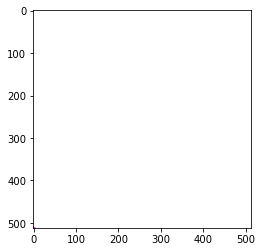

In [55]:
tf.keras.models.load_model('/home/netrunner/Desktop/Raks/val_256/cat1.model', custom_objects=None, compile=True)
arr=[]

img1 = cv2.imread('/home/netrunner/Desktop/Raks/val_256/458.tiff')
img1 = cv2.resize(img1 ,(512,512))
plt.imshow(img1)
# print(img1)
# img1/255
# print(img1)
arr.append(img1)
# np.append(img1_nir, img1)


arr = np.array(arr, dtype = float)
arr = arr.reshape(arr.shape)

output=model.predict(arr)
output=output*255
result=np.zeros((512,512,3))
result[:,:,:]=output[0][:,:,:]
print(output[0])
plt.imshow(result,vmin=0,vmax=255)
print("cat")
print(result)
cv2.imwrite("otp.jpg", result)